# Chapter 6
# Decision Trees



## Task 1: Predict if John will play tennis

<img src="Data/DT_2.png" width="400">

- It is hard to see how existing data can help us making decisions on new data
- Split cases according to the outlook

<img src="Data/DT_3.png">

- John played tennis in overcast weather
- If it is sunny or rainy, John's decision depends on other factors as well.
- Split this group further by humidity

<img src="Data/DT_3.png">
- If it was sunny with high humidity, John always played tennis
- If it was sunny with normal humidity, John never played tennis
- Split rainy group by wind strength

<img src="Data/DT_4.png">
- If it was rainy with strong wind, John never player tennis
- If it was rainy with weak wind, John always played tennis
- How about the new data?

<img src="Data/DT_5.png">

## Decision Tree Algorithm
- Choose the best feature for splitting the data into subsets
- If a subset is pure: stop
- If a subset is impure: repeat

**Question: How should we determine which feature to choose?** How to measure the impurity of a subset?
<img src="Data/DT_6.png">
- The measurement should clearly distinguish the pure case (100% for one outcome) and the completely uncertain case (50% - 50%)
- The measurement should be symmetric: (4 yes / 0 no) is just as good as (0 yes / 4 no)

### Use Gini Impurity as measurement

For each subset:
- Let $p_{yes}$ be the probability of a randomly chosen case in the subset to be a yes. 
- Let $p_{no}$ be the probability of a randomly chosen case in the subset to be a no
- The **Gini impurity** of this subset is calculated as

$G = 1 - p_{yes}^2 - p_{no}^2$

**Discussion**: 
- What is the minimal value for Gini impurity?
0.
- What subsets have minimal Gini impurity? 
pure sets (P_yes = 1, p_no = 0, or p_yes = 0, p_no = 1)
- What is the maximal value for Gini impurity?
It happens when there are equal number of instances for each outcome. In this case p_yes = p_no = 1/2, and G = 1/2.
- What subsets have maximal Gini impurity?
- Does (4 yes / 0 no) has the same Gini impurity as (0 yes / 4 no)?
In both cases, the Gini impurity is 0.

For example, in the "Sunny" subset there are 2 yes and 3 no, so a randomly chosen case is yes with probability $2 / 5 = 0.4$, and it is no with probability $3 / 5 = 0.6$. Its Gini impurity is 

$G_{sunny} = 1 - 0.4^2 - 0.6^2 = 0.48$.

- Gini impurity for "Overcast":$G_{overcast}=1 - 1^2 = 0$
- Gini impurity for "Rain":$G_{rain}=1 - 0.6^2 - 0.4^2 = 0.48$

The overall cost of using "Outlook" to split the data is a weighted sum of all Gini impurities:

$J(outlook) = \frac{m_{sunny}}{m}G_{sunny} + \frac{m_{overcast}}{m}G_{overcast} + \frac{m_{rain}}{m}G_{rain}=\frac{5}{14}\times 0.48 + \frac{4}{14}\times 0 + \frac{5}{14}\times 0.48 = 0.3429$

Here $m_{subset}$ is the number of instances in the subset, m is the total number of instances.

Next, compute the cost of using "Wind" to split the data:
- Gini impurity for "Weak": $G_{weak} = 1 - 0.75^2 - 0.25^2 = 0.375$
- Gini impurity for "Strong": $G_{strong} = 1 - 0.5^2 - 0.5^2 = 0.5$
- $J(wind) = \frac{8}{14}G_{weak} + \frac{6}{14}G_{strong}= 0.4286$

**Conclusion**: Outlook splits the dataset better.

### Use entropy as measurement
For each subset, its **entropy** is calculates as

$H = -p_{yes}\log(p_{yes}) - p_{no}\log(p_{no})$. 

Note that $log(p)$ is undefined if $p=0$. In this case we let $p\log(p)=0$.

**Discussion**: 
- What is the minimal value for entropy?
0.
- What subsets have minimal entropy? 
pure sets achieves 0 entropy.
- What is the maximal value for entropy?
Max = log(number of outcomes).
- What subsets have maximal entropy?
Subsets with equal number of each outcomes.
- Does (4 yes / 0 no) has the same entropy as (0 yes / 4 no)?



- $H_{sunny} = -0.4\times\log(0.4) - 0.6\times\log(0.6) = 0.2923$
- $H_{overcast} = -1\times\log(1) - 0\times\log(0) = 0$
- $H_{rain} = -0.6\times\log(0.6) - 0.4\times\log(0.4)=0.2923$.
- The overall cost of "Outlook" is a weighted sum of all entropies:

$J(outlook) = \frac{m_{sunny}}{m}H_{sunny} + \frac{m_{overcast}}{m}H_{overcast} + \frac{m_{rain}}{m}H_{rain}=\frac{5}{14}\times 0.2923 + \frac{4}{14}\times 0 + \frac{5}{14}\times 0.2923 = 0.2088$

In [1]:
# Calculate the entropy cost of using "Wind" to split the data
import numpy as np
e_weak = -(6/8)*np.log(6/8) -(2/8)*np.log(2/8)
e_strong = -(3/6)*np.log(3/6) -(3/6)*np.log(3/6)
w_wind = (8/14)*e_weak + (6/14)*e_strong
print(w_wind)

0.6183974457364384


## Task 2: Classification of Iris flowers

Recall that this is a dataset of 150 records under 5 attributes - petal length, petal width, sepal length, sepal width, and class. The goal of this classification task is to predict the class of each flower based on the other four attributes.

In [2]:
# Train a decision tree on petal length and width
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [3]:
# Visualize the classification rule
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="Data/iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [4]:
!dot -Tpng iris_tree.dot -o iris_tree.png

/bin/sh: 1: dot: not found


Then convert this .dot file to .png image using command:

dot -Tpng iris_tree.dot -o iris_tree.png

Graphviz is an open source graph visualization software package, available at http://www.graphviz.org.

![](Data/iris_tree.png)

/home/liang/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


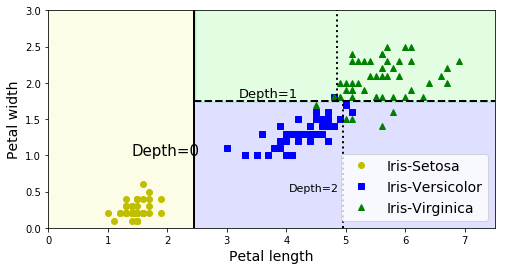

In [5]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf,
                           X,
                           y,
                           axes=[0, 7.5, 0, 3]):
    
    # Create a grid of points
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    # Use numpy.ravel() to flatten x1 and x2
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    # Use classifier to obtain predictions on X_new 
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    # Pick three colors representing classes
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    
    # Use contourf() to draw classification areas
    plt.contourf(x1,
                 x2,
                 y_pred,
                 alpha=0.3,
                 cmap=custom_cmap,
                 linewidth=10)
    
    # plot training instances
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
    plt.axis(axes)
        
    # Display label and legends
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "Depth=2", fontsize=11)

plt.show()

### Discussion
Decision trees make very few assumptions about the training data. If left unconstrained, the tree structure will adapt itself to overfitting the training data. Thus it is necessary to use hyperparameters to restrict the shape of Decision tree.
- max_depth: the maximal depth of the decision tree
- min_sample_split: the minimum number of samples a node must have before it can split
- min_samples_leaf: the minimum number of samples a leaf node must have
- min_weight_fraction_leaf: the minimum fraction of samples a leaf node must have
- max_leaf_nodes: the maximum number of leaf nodes
- max_features: the maximum number of features evaluated at each node

Increasing min_* or reducing max_* will reduce overfitting.
![](Data/DT_8.png)

## Task 3: Regression Trees
Decision trees are also capable of performing regression tasks. The main differences are:
- Instead of predicting a class in each node, it predicts a value
- Gini impurity and entropy are no longer viable choices for cost function. A common choice is MSE (mean square error) function.

In [6]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

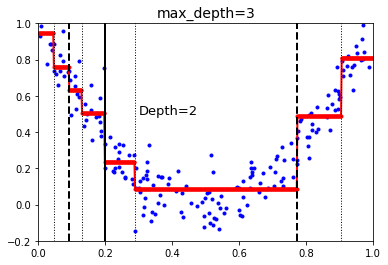

In [8]:
def plot_regression_predictions(tree_reg,
                                X,
                                y,
                                axes=[0, 1, -0.2, 1]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2)

plot_regression_predictions(tree_reg, X, y)

# Draw decision boundaries
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)
plt.show()

### Discussion: What are pros and cons of the decision tree model?